# FIFA 21

## ETL

In [1]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e62b6c1bb76c4710b1d1cc5aeab9a929 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9ZymKSD_6E0Aw3YRO1fn1RBF95BmxW_zKvIslTE4CC4g',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e62b6c1bb76c4710b1d1cc5aeab9a929.get_object(Bucket='databel-donotdelete-pr-d4qsbyzwywn9lq',Key='players_fifa21.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head(10)


,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,33,170,72,https://cdn.sofifa.com/players/158/023/21_60.png,Argentina,93,93,...,93,90,93,69,68,69,65,55,65,22
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,35,187,83,https://cdn.sofifa.com/players/020/801/21_60.png,Portugal,92,92,...,91,84,91,68,64,68,64,57,64,23
2,188545,R. Lewandowski,Robert Lewandowski,31,184,80,https://cdn.sofifa.com/players/188/545/21_60.png,Poland,91,91,...,86,82,86,67,68,67,64,63,64,22
3,190871,Neymar Jr,Neymar da Silva Santos Jr.,28,175,68,https://cdn.sofifa.com/players/190/871/21_60.png,Brazil,91,91,...,91,86,91,70,65,70,65,52,65,23
4,192985,K. De Bruyne,Kevin De Bruyne,29,181,70,https://cdn.sofifa.com/players/192/985/21_60.png,Belgium,91,91,...,91,91,91,82,83,82,78,72,78,24
5,200389,J. Oblak,Jan Oblak,27,188,87,https://cdn.sofifa.com/players/200/389/21_60.png,Slovenia,91,93,...,38,41,38,35,39,35,35,36,35,92
6,203376,V. van Dijk,Virgil van Dijk,28,193,92,https://cdn.sofifa.com/players/203/376/21_60.png,Netherlands,90,91,...,73,79,73,83,88,83,85,91,85,23
7,209331,M. Salah,Mohamed Salah,28,175,71,https://cdn.sofifa.com/players/209/331/21_60.png,Egypt,90,90,...,90,85,90,74,71,74,70,61,70,25
8,231747,K. Mbappé,Kylian Mbappé,21,178,73,https://cdn.sofifa.com/players/231/747/21_60.png,France,90,95,...,90,82,90,70,66,70,66,58,66,21
9,208722,S. Mané,Sadio Mané,28,175,69,https://cdn.sofifa.com/players/208/722/21_60.png,Senegal,90,90,...,90,84,90,72,68,72,69,62,69,23


In [2]:
!pip install --upgrade pixiedust;

Requirement already up-to-date: pixiedust in /opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages (1.1.18)


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import RFECV

### DATA EXPLORATION

In [4]:
df_fifa = df_data_1

In [5]:
!pip install brunel
import pixiedust
import brunel
from ibm_watson_machine_learning import APIClient;

Pixiedust database opened successfully


2020-11-01 16:27:30,963 - matplotlib.font_manager - WARNING - findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
2020-11-01 16:27:33,335 - matplotlib.font_manager - WARNING - findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
2020-11-01 16:27:47,867 - matplotlib.font_manager - WARNING - findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.



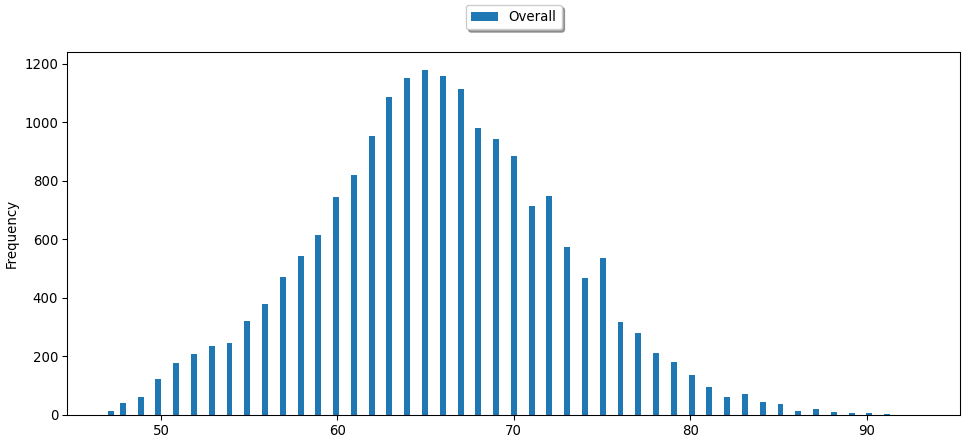

In [6]:
display(df_fifa)

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

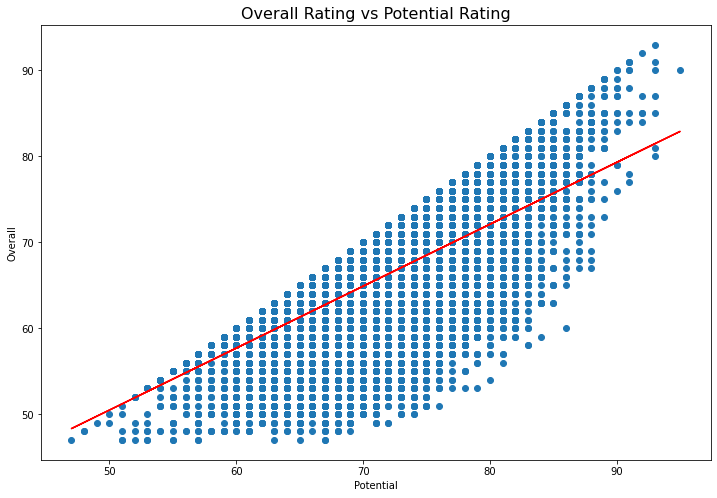

In [8]:
plt.figure(figsize = (12,8))
plt.scatter(x = df_fifa["Potential"], y = df_fifa["Overall"])
m, b = np.polyfit(df_fifa["Potential"], df_fifa["Overall"], 1)
plt.plot(df_fifa["Potential"], m*df_fifa["Potential"]+b, "r-")
plt.xlabel("Potential")
plt.ylabel("Overall")
plt.title("Overall Rating vs Potential Rating", fontsize = 16)
plt.show()

Text(0.5, 1.0, 'Histogram of Age')

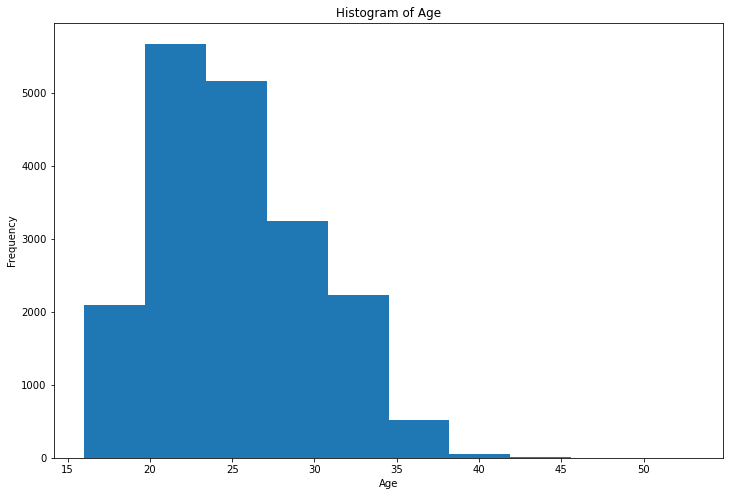

In [9]:
plt.figure(figsize = (12,8))
plt.hist(df_fifa["Age"])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age")

In [10]:
df_fifa_top = df_fifa.head(10)

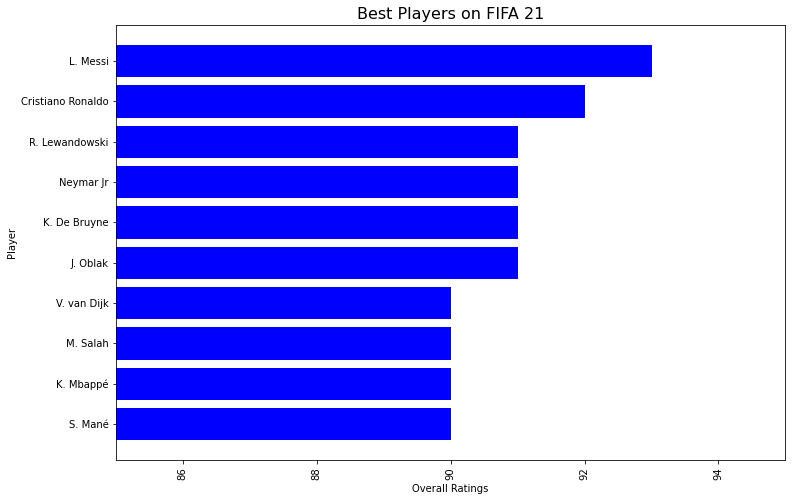

In [11]:
plt.figure(figsize = (12,8))
plt.barh("Name", "Overall", data = df_fifa_top, color = "blue")
plt.xlim((85,95))
plt.xticks(rotation = 90)
plt.gca().invert_yaxis()
plt.ylabel("Player")
plt.xlabel("Overall Ratings")
plt.title("Best Players on FIFA 21", fontsize = 16);

## MODELING

In [12]:
df_fifa_new = df_fifa[['Potential','Name','Growth', 'WeakFoot', 'SkillMoves', 'AttackingWorkRate','DefensiveWorkRate','ReleaseClause', 'ValueEUR', 'WageEUR', 'Age']]

In [13]:
import seaborn as sns;sns.set(style="ticks")

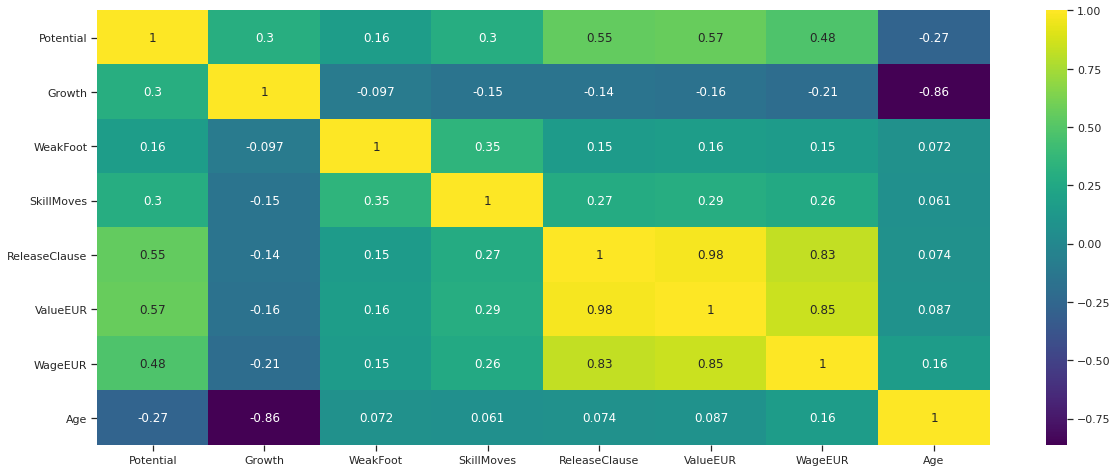

In [14]:
plt.figure(figsize = (20,8))
cor = df_fifa_new.corr()
sns.heatmap(cor, annot = True, cmap = "viridis")
plt.show();

In [15]:
df_fifa_new.shape

(18979, 11)

In [16]:
df_fifa_new.columns

Index(['Potential', 'Name', 'Growth', 'WeakFoot', 'SkillMoves',
       'AttackingWorkRate', 'DefensiveWorkRate', 'ReleaseClause', 'ValueEUR',
       'WageEUR', 'Age'],
      dtype='object')

In [17]:
df_fifa_x = df_fifa_new.iloc[:, 1:]
df_fifa_y = df_fifa_new.iloc[:, :1]
x_train, x_test, y_train, y_test = train_test_split(df_fifa_x, df_fifa_y, random_state = 10, train_size = 0.8)

In [18]:
x_train1 = x_train.iloc[:,1:]
x_test1 = x_test.iloc[:,1:]

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [20]:
### Pre-processing
ord_enc = OrdinalEncoder()
ord_enc.fit([['Low', 1], ['Medium', 2], ['High', 3]])
one_hot = OneHotEncoder()
df_fifa_new_list = df_fifa_new[['AttackingWorkRate', 'DefensiveWorkRate']]
ord_list = list(df_fifa_new_list)
column_pipeline = ColumnTransformer([("ord", ord_enc, ord_list),("std",StandardScaler(), ['Growth', 'WeakFoot','SkillMoves','ReleaseClause', 'ValueEUR', 'WageEUR', 'Age'])])
lin_reg = LinearRegression()

In [21]:
full_pipeline = Pipeline([("column", column_pipeline), ("feature selection", RFECV(Lasso(alpha = 0.1), cv = 5)), ("reg", RandomForestRegressor())])

In [22]:
param_grid = [{'reg__n_estimators': np.arange(1,50), 'reg__max_features':np.arange(1,10)},]
grid_search = GridSearchCV(full_pipeline, param_grid, cv = 5, scoring = "r2")

In [23]:
grid_search.fit(x_train1, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('column',
                                        ColumnTransformer(transformers=[('ord',
                                                                         OrdinalEncoder(),
                                                                         ['AttackingWorkRate',
                                                                          'DefensiveWorkRate']),
                                                                        ('std',
                                                                         StandardScaler(),
                                                                         ['Growth',
                                                                          'WeakFoot',
                                                                          'SkillMoves',
                                                                          'ReleaseClause',
                                                

In [24]:
grid_search.best_estimator_

Pipeline(steps=[('column',
                 ColumnTransformer(transformers=[('ord', OrdinalEncoder(),
                                                  ['AttackingWorkRate',
                                                   'DefensiveWorkRate']),
                                                 ('std', StandardScaler(),
                                                  ['Growth', 'WeakFoot',
                                                   'SkillMoves',
                                                   'ReleaseClause', 'ValueEUR',
                                                   'WageEUR', 'Age'])])),
                ('feature selection', RFECV(cv=5, estimator=Lasso(alpha=0.1))),
                ('reg',
                 RandomForestRegressor(max_features=7, n_estimators=22))])

In [25]:
grid_search.best_score_

0.9816597327099761

In [26]:
final_model = grid_search.best_estimator_

In [27]:
train_pipeline = Pipeline([("column", column_pipeline), ("feature selection", RFECV(Lasso(alpha = 0.1), cv = 5)), ("reg", RandomForestRegressor(max_features=7, n_estimators = 22))])
from sklearn.pipeline import make_pipeline

In [28]:
y_pred_cv = cross_val_predict(train_pipeline, x_train1, y_train, cv = 5)

In [29]:
x_train_new = x_train.copy()
x_train_new["Potential"] = y_train
x_train_new["Predicted"] = y_pred_cv
x_train_final = x_train_new.reset_index()
x_train_final = x_train_final.drop("index", axis = 1)
x_train_final.head(20)

,Name,Growth,WeakFoot,SkillMoves,AttackingWorkRate,DefensiveWorkRate,ReleaseClause,ValueEUR,WageEUR,Age,Potential,Predicted
0,G. Carabajal,0,3,4,Medium,Medium,8300000,5500000,14000,28,74,74.227273
1,G. Johansson,12,2,2,Medium,Medium,160000,110000,500,19,66,65.681818
2,J. Kayembe,3,4,3,Medium,Medium,1900000,1200000,6000,25,72,72.000000
3,I. Bolaño,12,3,3,Medium,Medium,380000,230000,2000,22,70,70.045455
4,M. Dudek,22,2,1,Medium,Medium,212000,90000,500,17,74,73.227273
5,Joan Jordán,3,4,4,Medium,Medium,33700000,15500000,30000,25,82,81.909091
6,J. Parra,11,2,2,Medium,Medium,171000,110000,500,19,65,64.909091
7,S. Savić,3,4,3,Medium,Medium,1600000,1100000,3000,26,71,71.272727
8,Jon Morcillo,9,4,4,High,Medium,3700000,1600000,9000,21,78,77.909091
9,L. Czyborra,10,3,2,High,Medium,0,1500000,5000,21,79,78.818182


In [30]:
train_pipeline.fit(x_train1, y_train)

Pipeline(steps=[('column',
                 ColumnTransformer(transformers=[('ord', OrdinalEncoder(),
                                                  ['AttackingWorkRate',
                                                   'DefensiveWorkRate']),
                                                 ('std', StandardScaler(),
                                                  ['Growth', 'WeakFoot',
                                                   'SkillMoves',
                                                   'ReleaseClause', 'ValueEUR',
                                                   'WageEUR', 'Age'])])),
                ('feature selection', RFECV(cv=5, estimator=Lasso(alpha=0.1))),
                ('reg',
                 RandomForestRegressor(max_features=7, n_estimators=22))])

In [31]:
y_pred = train_pipeline.predict(x_test)

In [32]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2_score(y_test, y_pred)

0.9814241446754413

In [33]:
import math
math.sqrt(mean_squared_error(y_test, y_pred))

0.8535623763544326

In [34]:
x_test_new = x_test.copy()
x_test_new["Potential"] = y_test
x_test_new["Predicted"] = y_pred
x_test_final = x_test_new.reset_index()
x_test_final = x_test_final.drop("index", axis = 1)
x_test_final.head(20)

,Name,Growth,WeakFoot,SkillMoves,AttackingWorkRate,DefensiveWorkRate,ReleaseClause,ValueEUR,WageEUR,Age,Potential,Predicted
0,Bai Yuefeng,0,3,2,Medium,Medium,217000,140000,3000,33,62,62.000000
1,A. Șerban,13,2,2,High,Low,790000,400000,650,19,73,73.681818
2,L. Bridcutt,0,3,3,Low,High,1400000,800000,6000,31,69,68.727273
3,F. Kent,7,3,2,Medium,High,1300000,675000,3000,24,72,71.954545
4,De Tomás,2,4,3,Medium,Medium,20500000,13000000,12000,25,80,80.045455
5,E. Segura,7,3,2,Low,High,2200000,1300000,3000,23,76,75.636364
6,J. Tabinas,7,3,2,High,Medium,0,250000,1000,21,67,66.954545
7,M. Bakker,12,2,1,Medium,Medium,595000,350000,600,19,73,72.545455
8,Gonçalo Guedes,6,4,4,High,Low,56400000,24500000,39000,23,87,86.545455
9,N. Freire,2,3,2,Medium,Medium,2000000,1100000,6000,26,71,70.818182
